In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import json
%matplotlib inline

In [2]:
df = pd.read_csv("actor_character_age_difference.csv")
df

,name,birthday,title,character_name,character_year,characterage,character_gender,love_interest,release_date,actor_age,character_age,age_difference
0,Ben Platt,1993-09-24,The Politician,Payton Hobart,hs senior,NaN,M,"Alice Charles, Astrid Sloan, River Barkley",2019-09-27,26.0,17.0,9.0
1,Zoey Deutch,1994-11-10,The Politician,Infinity Jackson,hs senior,NaN,F,NaN,2019-09-27,24.0,17.0,7.0
2,Lucy Boynton,1994-01-17,The Politician,Astrid Sloan,hs senior,NaN,F,"Payton Hobart, River Barkley",2019-09-27,25.0,17.0,8.0
3,Julia Schlaepfer,1995-03-03,The Politician,Alice Charles,hs senior,NaN,F,"Payton Hobart, James Sullivan",2019-09-27,24.0,17.0,7.0
4,Laura Dreyfuss,1988-08-22,The Politician,McAfee Westbrook,hs senior,NaN,F,Skye Leighton,2019-09-27,31.0,17.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,Thomas Mitchell Barnet,NaN,Locke & Key,Sam Lesser,hs junior,NaN,M,NaN,2020-02-07,NaN,16.0,NaN
239,Kevin Alves,1991-10-19,Locke & Key,Javi,hs junior,NaN,M,NaN,2020-02-07,28.0,16.0,12.0
240,Asha Bromfield,1994-11-09,Locke & Key,Zadie Wells,hs junior,NaN,F,NaN,2020-02-07,25.0,16.0,9.0
241,Felix Mallard,1998-04-20,Locke & Key,Lucas Caravaggio,NaN,17.0,M,NaN,2020-02-07,21.0,17.0,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              243 non-null    object 
 1   birthday          227 non-null    object 
 2   title             243 non-null    object 
 3   character_name    243 non-null    object 
 4   character_year    111 non-null    object 
 5   characterage      131 non-null    float64
 6   character_gender  243 non-null    object 
 7   love_interest     132 non-null    object 
 8   release_date      243 non-null    object 
 9   actor_age         227 non-null    float64
 10  character_age     241 non-null    float64
 11  age_difference    226 non-null    float64
dtypes: float64(4), object(8)
memory usage: 22.9+ KB


In [5]:
import pandas as pd

# Suponiendo que 'data' es tu DataFrame
data_subset = df[['name', 'love_interest']].copy()

# Eliminar filas con valores nulos en 'love_interest'
data_subset = data_subset.dropna(subset=['love_interest'])

# Convertir la columna 'love_interest' a una lista de intereses amorosos
data_subset['love_interest'] = data_subset['love_interest'].apply(lambda x: x.split(', '))

# Crear una lista de diccionarios para representar los nodos del árbol
nodes = []
for index, row in data_subset.iterrows():
    for interest in row['love_interest']:
        nodes.append({'name': row['name'], 'love_interest': interest})

# Mostrar los primeros 5 nodos como ejemplo
print(nodes[:5])


[{'name': 'Ben Platt', 'love_interest': 'Alice Charles'}, {'name': 'Ben Platt', 'love_interest': 'Astrid Sloan'}, {'name': 'Ben Platt', 'love_interest': 'River Barkley'}, {'name': 'Lucy Boynton', 'love_interest': 'Payton Hobart'}, {'name': 'Lucy Boynton', 'love_interest': 'River Barkley'}]


In [6]:
nodes

[{'name': 'Ben Platt', 'love_interest': 'Alice Charles'},
 {'name': 'Ben Platt', 'love_interest': 'Astrid Sloan'},
 {'name': 'Ben Platt', 'love_interest': 'River Barkley'},
 {'name': 'Lucy Boynton', 'love_interest': 'Payton Hobart'},
 {'name': 'Lucy Boynton', 'love_interest': 'River Barkley'},
 {'name': 'Julia Schlaepfer', 'love_interest': 'Payton Hobart'},
 {'name': 'Julia Schlaepfer', 'love_interest': 'James Sullivan'},
 {'name': 'Laura Dreyfuss', 'love_interest': 'Skye Leighton'},
 {'name': 'Theo Germaine', 'love_interest': 'Alice Charles'},
 {'name': 'Rahne Jones', 'love_interest': 'McAfee Westbrook'},
 {'name': 'David Corenswet', 'love_interest': 'Astrid Sloan'},
 {'name': 'David Corenswet', 'love_interest': 'Payton Hobart'},
 {'name': 'Alexis Bledel', 'love_interest': 'Dean Forester'},
 {'name': 'Jared Padalecki', 'love_interest': 'Rory Gilmore'},
 {'name': 'Asa Butterfield', 'love_interest': 'Maeve Wiley'},
 {'name': 'Asa Butterfield', 'love_interest': 'Lily Iglehart'},
 {'name'

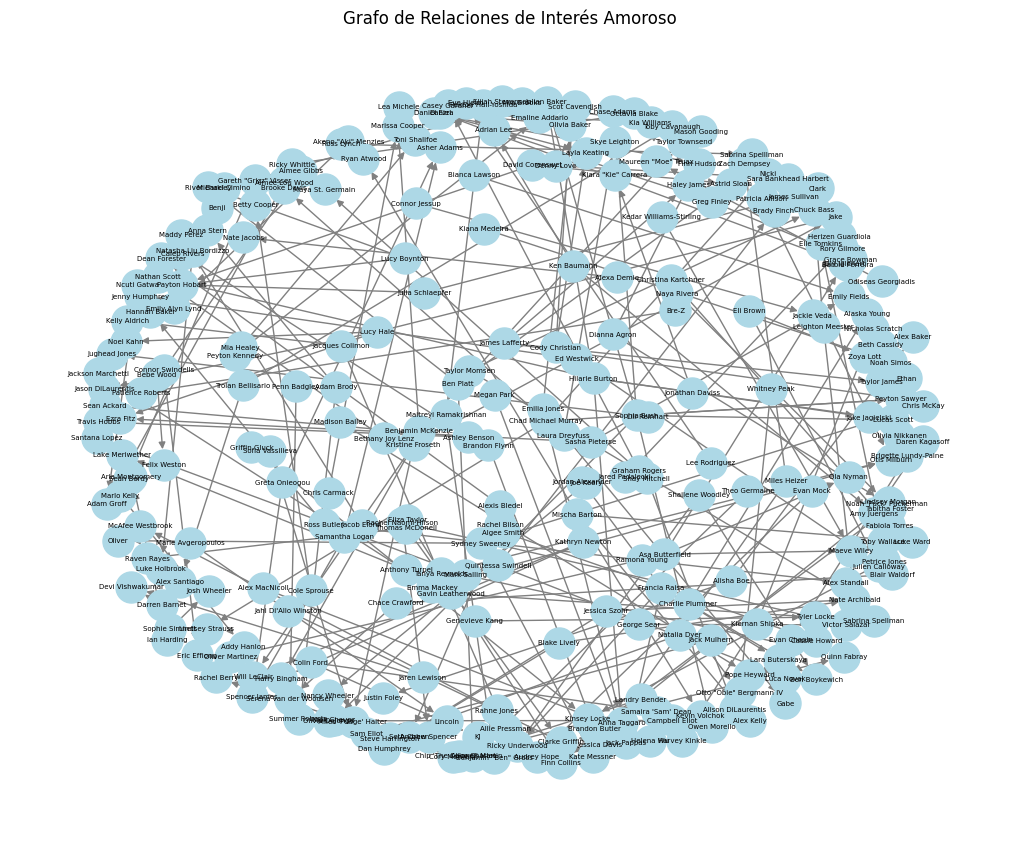

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos y aristas al grafo
for node in nodes:
    G.add_node(node['name'])
    G.add_edge(node['name'], node['love_interest'])

# Dibujar el grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5)  # Layout utilizando un algoritmo de resorte
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=5, font_color='black', edge_color='gray', arrowsize=10)
plt.title("Grafo de Relaciones de Interés Amoroso")
plt.axis('off')
plt.show()


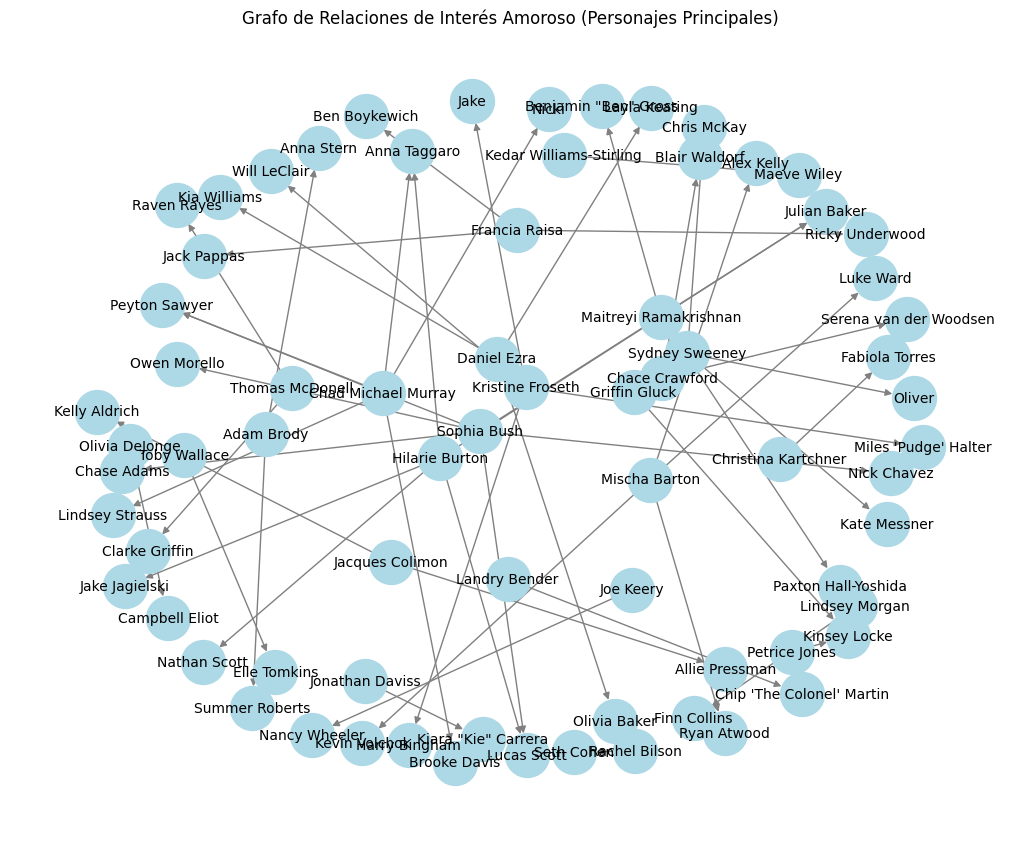

In [8]:
import random

# Obtener la mitad de los nodos de forma aleatoria
reduced_nodes = random.sample(nodes, len(nodes) // 8)

# Crear una lista de nombres de nodos filtrados
filtered_nodes = [node['name'] for node in reduced_nodes]

# Crear una lista de aristas filtradas
filtered_edges = [(node['name'], node['love_interest']) for node in nodes if node['name'] in filtered_nodes]

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos y aristas filtrados al grafo
G.add_edges_from(filtered_edges)

# Resto del código para dibujar el grafo...

# Dibujar el grafo con un diseño más espaciado
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.6)  # Ajustar el parámetro 'k' para aumentar la separación entre nodos
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_color='black', edge_color='gray', arrowsize=10)
plt.title("Grafo de Relaciones de Interés Amoroso (Personajes Principales)")
plt.axis('off')
plt.show()
